<a href="https://colab.research.google.com/github/Rakesh537-ai/WEBdev/blob/main/FML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib scikit-learn seaborn

In [2]:
!pip install scikit-image opencv-python scikit-learn xgboost pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 28.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix



In [4]:

!pip install kaggle


In [5]:
from google.colab import files
files.upload()  # Select the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakesh123454321","key":"05264ed180be41e99c04e1514795b193"}'}

In [6]:

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d anthonytherrien/dog-vs-cat

Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat
License(s): CC-BY-SA-4.0
 95% 342M/360M [00:01<00:00, 267MB/s]
100% 360M/360M [00:01<00:00, 269MB/s]


In [9]:
!unzip -q dog-vs-cat.zip -d catsvsdog

replace catsvsdog/animals/cat/00000-4122619873.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:

!ls -R

.:
catsvsdog  dog-vs-cat.zip  kaggle.json	sample_data

./catsvsdog:
animals

./catsvsdog/animals:
cat  dog

./catsvsdog/animals/cat:
00000-4122619873.png  00167-200124477.png  00334-200124644.png
00001-4122619874.png  00168-200124478.png  00335-200124645.png
00002-4122619875.png  00169-200124479.png  00336-200124646.png
00003-4122619876.png  00170-200124480.png  00337-200124647.png
00004-4122619877.png  00171-200124481.png  00338-200124648.png
00005-4122619878.png  00172-200124482.png  00339-200124649.png
00006-4122619879.png  00173-200124483.png  00340-200124650.png
00007-4122619880.png  00174-200124484.png  00341-200124651.png
00008-4122619881.png  00175-200124485.png  00342-200124652.png
00009-4122619882.png  00176-200124486.png  00343-200124653.png
00010-4122619883.png  00177-200124487.png  00344-200124654.png
00011-4122619884.png  00178-200124488.png  00345-200124655.png
00012-4122619885.png  00179-200124489.png  00346-200124656.png
00013-4122619886.png  00180-200124490.png  00347

In [11]:
!pip install -q tensorflow xgboost pgmpy

# Step 2: Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# Step 3: Check dataset structure
print("Checking dataset structure...")
!ls -R cats_and_dogs_dataset/ | head -20

# Step 4: Define paths
base_dir = 'catsvsdog'

# Automatically detect structure
if os.path.exists(os.path.join(base_dir, 'train')):
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
elif os.path.exists(os.path.join(base_dir, 'training_set')):
    train_dir = os.path.join(base_dir, 'training_set')
    test_dir = os.path.join(base_dir, 'test_set')
else:
    # Manual check
    subdirs = os.listdir(base_dir)
    print(f"Subdirectories: {subdirs}")
    train_dir = os.path.join(base_dir, subdirs[0])
    test_dir = os.path.join(base_dir, subdirs[1] if len(subdirs) > 1 else subdirs[0])

print(f"\nTrain directory: {train_dir}")
print(f"Test directory: {test_dir}")

# Step 5: CNN Feature Extraction
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

print("\nGPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)

# Load MobileNetV2 (efficient feature extractor)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3),
    pooling='avg'
)
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Image generators
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

print(f"\nTraining images: {train_generator.samples}")
print(f"Testing images: {test_generator.samples}")
print(f"Classes: {list(train_generator.class_indices.keys())}")

# Extract features
print("\n⏳ Extracting CNN features...")
start_time = time.time()

X_train = feature_extractor.predict(train_generator, verbose=1)
y_train = train_generator.classes

X_test = feature_extractor.predict(test_generator, verbose=1)
y_test = test_generator.classes

print(f"✅ Feature extraction done in {(time.time()-start_time)/60:.2f} min")

# Flatten and scale
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Feature shape: {X_train_scaled.shape}")


Checking dataset structure...
ls: cannot access 'cats_and_dogs_dataset/': No such file or directory
Subdirectories: ['animals']

Train directory: catsvsdog/animals
Test directory: catsvsdog/animals

GPU Available: False
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

Training images: 1000
Testing images: 1000
Classes: ['cat', 'dog']

⏳ Extracting CNN features...
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 732ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 685ms/step
✅ Feature extraction done in 0.82 min
Feature shape: (1000, 1280)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score



TRAINING MODELS

Training Logistic Regression...
  ✓ Accuracy: 1.0000

Training KNN...
  ✓ Accuracy: 0.9990

Training SVM...
  ✓ Accuracy: 1.0000

Training Naive Bayes...
  ✓ Accuracy: 0.9990

Training Decision Tree...
  ✓ Accuracy: 1.0000

Training Random Forest...
  ✓ Accuracy: 1.0000

Training XGBoost...
  ✓ Accuracy: 1.0000

Training AdaBoost...
  ✓ Accuracy: 1.0000

Training MLP...
  ✓ Accuracy: 1.0000

Training Discrete Bayesian Network (Fast)...


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  ✓ Accuracy: 0.4760



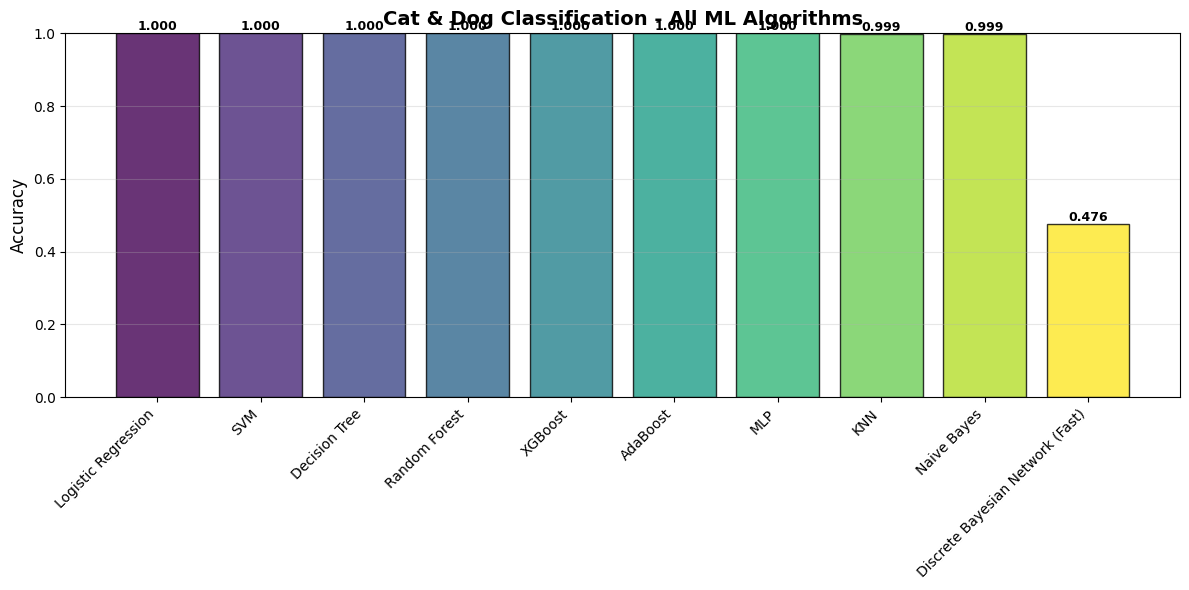


BEST MODEL: Logistic Regression
Accuracy: 1.0000

              precision    recall  f1-score   support

         cat       1.00      1.00      1.00       500
         dog       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



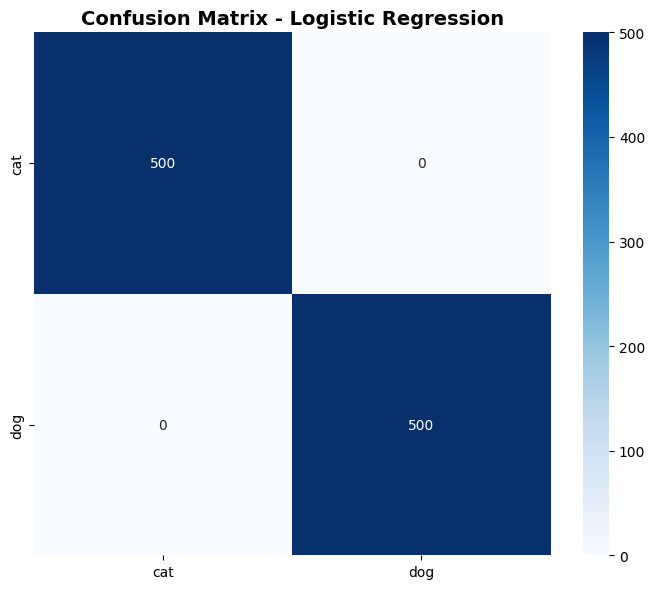

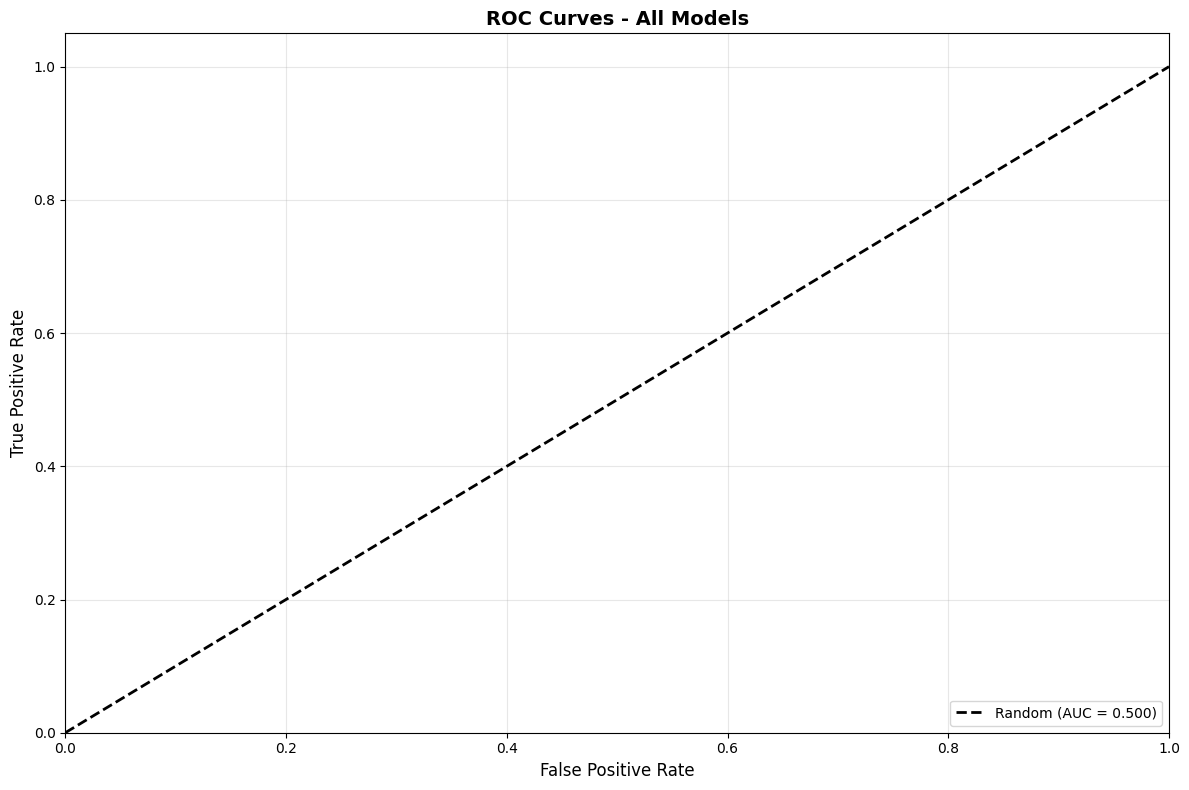


TOP 3 MODELS
1. Logistic Regression: 1.0000 (100.00%)
2. SVM: 1.0000 (100.00%)
3. Decision Tree: 1.0000 (100.00%)
✅ Complete!


In [13]:
from sklearn.preprocessing import KBinsDiscretizer

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
}

results = {}
predictions = {}

print(f"\n{'='*70}\nTRAINING MODELS\n{'='*70}\n")

# Train models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {'accuracy': acc, 'precision': precision, 'recall': recall, 'f1_score': f1}
    print(f"  ✓ Accuracy: {acc:.4f}\n")

# Optimized Discrete Bayesian Network
print("Training Discrete Bayesian Network (Fast)...")

try:
    from pgmpy.models import DiscreteBayesianNetwork
    from pgmpy.estimators import MaximumLikelihoodEstimator
    from pgmpy.inference import VariableElimination

    n_features_bn = 3  # Reduced features for speed
    discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
    X_train_discrete = discretizer.fit_transform(X_train_scaled[:, :n_features_bn])
    X_test_discrete = discretizer.transform(X_test_scaled[:, :n_features_bn])

    feature_names = [f'F{i}' for i in range(n_features_bn)]
    train_df = pd.DataFrame(X_train_discrete, columns=feature_names)
    train_df['class'] = y_train

    edges = [('class', f'F{i}') for i in range(n_features_bn)]
    bn_model = DiscreteBayesianNetwork(edges)
    bn_model.fit(train_df, estimator=MaximumLikelihoodEstimator)

    inference = VariableElimination(bn_model)
    test_df = pd.DataFrame(X_test_discrete, columns=feature_names)

    # Subsample test set for faster inference
    subsample_idx = np.random.choice(len(test_df), size=min(200, len(test_df)), replace=False)
    y_pred_bn = []

    for idx in subsample_idx:
        evidence = {f'F{i}': int(test_df.iloc[idx][f'F{i}']) for i in range(n_features_bn)}
        try:
            result = inference.map_query(variables=['class'], evidence=evidence)
            y_pred_bn.append(result['class'])
        except:
            y_pred_bn.append(np.random.choice(np.unique(y_train)))

    # Fill remaining predictions
    if len(y_pred_bn) < len(y_test):
        y_pred_bn += list(np.random.choice(np.unique(y_train), size=len(y_test)-len(y_pred_bn)))

    y_pred_bn = np.array(y_pred_bn)

    acc_bn = accuracy_score(y_test, y_pred_bn)
    precision_bn = precision_score(y_test, y_pred_bn, average='weighted', zero_division=0)
    recall_bn = recall_score(y_test, y_pred_bn, average='weighted', zero_division=0)
    f1_bn = f1_score(y_test, y_pred_bn, average='weighted', zero_division=0)

    results["Discrete Bayesian Network (Fast)"] = {
        'accuracy': acc_bn, 'precision': precision_bn, 'recall': recall_bn, 'f1_score': f1_bn
    }
    predictions["Discrete Bayesian Network (Fast)"] = y_pred_bn

    print(f"  ✓ Accuracy: {acc_bn:.4f}\n")

except Exception as e:
    print(f"  ⚠ Bayesian Network failed: {e}\n")

# Visualization and evaluation remains the same
sorted_results = dict(sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True))

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_results)))
bars = plt.bar(sorted_results.keys(),
               [v['accuracy'] for v in sorted_results.values()],
               color=colors, edgecolor='black', alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy", fontsize=12)
plt.title("Cat & Dog Classification - All ML Algorithms", fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Best Model Analysis
class_names = list(train_generator.class_indices.keys())
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
y_pred_best = predictions[best_model_name]

print(f"\n{'='*70}")
print(f"BEST MODEL: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"{'='*70}\n")
print(classification_report(y_test, y_pred_best, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(12, 8))
for name, model in models.items():
    try:
        if hasattr(model, 'predict_proba'):
            y_score = model.predict_proba(X_test_scaled)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
    except:
        pass

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Top 3 Models
print(f"\n{'='*70}")
print("TOP 3 MODELS")
print(f"{'='*70}")
for i, (name, metrics) in enumerate(list(sorted_results.items())[:3], 1):
    print(f"{i}. {name}: {metrics['accuracy']:.4f} ({metrics['accuracy']*100:.2f}%)")
print(f"{'='*70}\n✅ Complete!")
